In [2]:
import generator

import numpy as np

import matplotlib.pyplot as plt

from skopt.plots import plot_gaussian_process
from skopt import Optimizer

In [3]:
bins_file = open('../exp_data/na49/binning.bin', 'r')

In [4]:
bins = []

for num, line in enumerate(bins_file.readlines()):

    if num % 2 == 0:
        
        a = line.split('|')

        for bin in a:

            bin = bin.replace('(', '').replace(')', '').replace(' ', '')
            bins.append(list(map(float, bin.split(','))))

bins = np.array(bins)

bins_file.close()

In [5]:
import pandas as pd

ids = [211]

refs = {}

for id in ids:
    
    refs[id] = pd.read_csv(f'../exp_data/na49/{id}.csv')

In [6]:
inst = {
    'Print:quiet': 'on',

    'Beams:frameType': '2',

    'Beams:idA': '2212',
    'Beams:idB': '2212',

    'Beams:eA': '158',
    'Beams:eB': '0',

    'SoftQCD:all': 'on',

    'Tune:pp': '1',

    'SigmaDiffractive:dampen': 'on',
    'SpaceShower:phiIntAsym': 'on',
    'SpaceShower:phiPolAsym': 'on',
    'SpaceShower:rapidityOrder': 'on',
    'SpaceShower:rapidityOrderMPI': 'on',
    'SpaceShower:samePTasMPI': 'off',
    'TimeShower:dampenBeamRecoil': 'on',
    'TimeShower:phiPolAsym': 'on',

    'MultipartonInteractions:ecmRef': '1800',
    }

In [7]:
optim_param = 'StringPT:sigma'

In [8]:
def objective(x, n_events, refs, agregate=None):

    new_val = x[0]

    inst[optim_param] = f'{new_val}'

    data, sigma = generator.generate(n_events, inst, bins)
    res =  generator.get_score(data, sigma, n_events, bins, refs, agregate)

    return res

In [9]:
def plot_optimizer(res, n_iter, max_iters=5):
    if n_iter == 0:
        show_legend = True
    else:
        show_legend = False
    ax = plt.subplot(max_iters, 2, 2 * n_iter + 1)
    # Plot GP(x) + contours
    ax = plot_gaussian_process(res, ax=ax,
                               #noise_level=noise_level,
                               show_legend=show_legend, show_title=True,
                               show_next_point=False, show_acq_func=False)
    ax.set_ylabel("")
    ax.set_xlabel("")
    if n_iter < max_iters - 1:
        ax.get_xaxis().set_ticklabels([])
    # Plot EI(x)
    ax = plt.subplot(max_iters, 2, 2 * n_iter + 2)
    ax = plot_gaussian_process(res, ax=ax,
                               #noise_level=noise_level,
                               show_legend=show_legend, show_title=False,
                               show_next_point=True, show_acq_func=True,
                               show_observations=False,
                               show_mu=False)
    ax.set_ylabel("")
    ax.set_xlabel("")
    if n_iter < max_iters - 1:
        ax.get_xaxis().set_ticklabels([])

In [29]:
n_initial_points = 20

opt_gp = Optimizer([(0., 1.)],
                   base_estimator="GP",
                   n_initial_points=n_initial_points,
                   acq_optimizer="sampling", acq_func='EI',
                   random_state=42, n_jobs=-1)

Iteration number 1


100%|██████████| 1000000/1000000 [02:07<00:00, 7866.00it/s]


Iteration number 11


100%|██████████| 1000000/1000000 [02:07<00:00, 7830.71it/s]


Iteration number 21


100%|██████████| 1000000/1000000 [02:11<00:00, 7603.38it/s]


Iteration number 31


100%|██████████| 1000000/1000000 [02:11<00:00, 7578.18it/s]


Iteration number 41


100%|██████████| 1000000/1000000 [02:12<00:00, 7519.23it/s]


Iteration number 51


100%|██████████| 1000000/1000000 [02:13<00:00, 7482.65it/s]


Iteration number 61


100%|██████████| 1000000/1000000 [02:12<00:00, 7546.97it/s]


Iteration number 71


100%|██████████| 1000000/1000000 [02:12<00:00, 7550.85it/s]


Iteration number 81


100%|██████████| 1000000/1000000 [02:10<00:00, 7648.58it/s]


Iteration number 91


100%|██████████| 1000000/1000000 [06:29<00:00, 2569.55it/s]


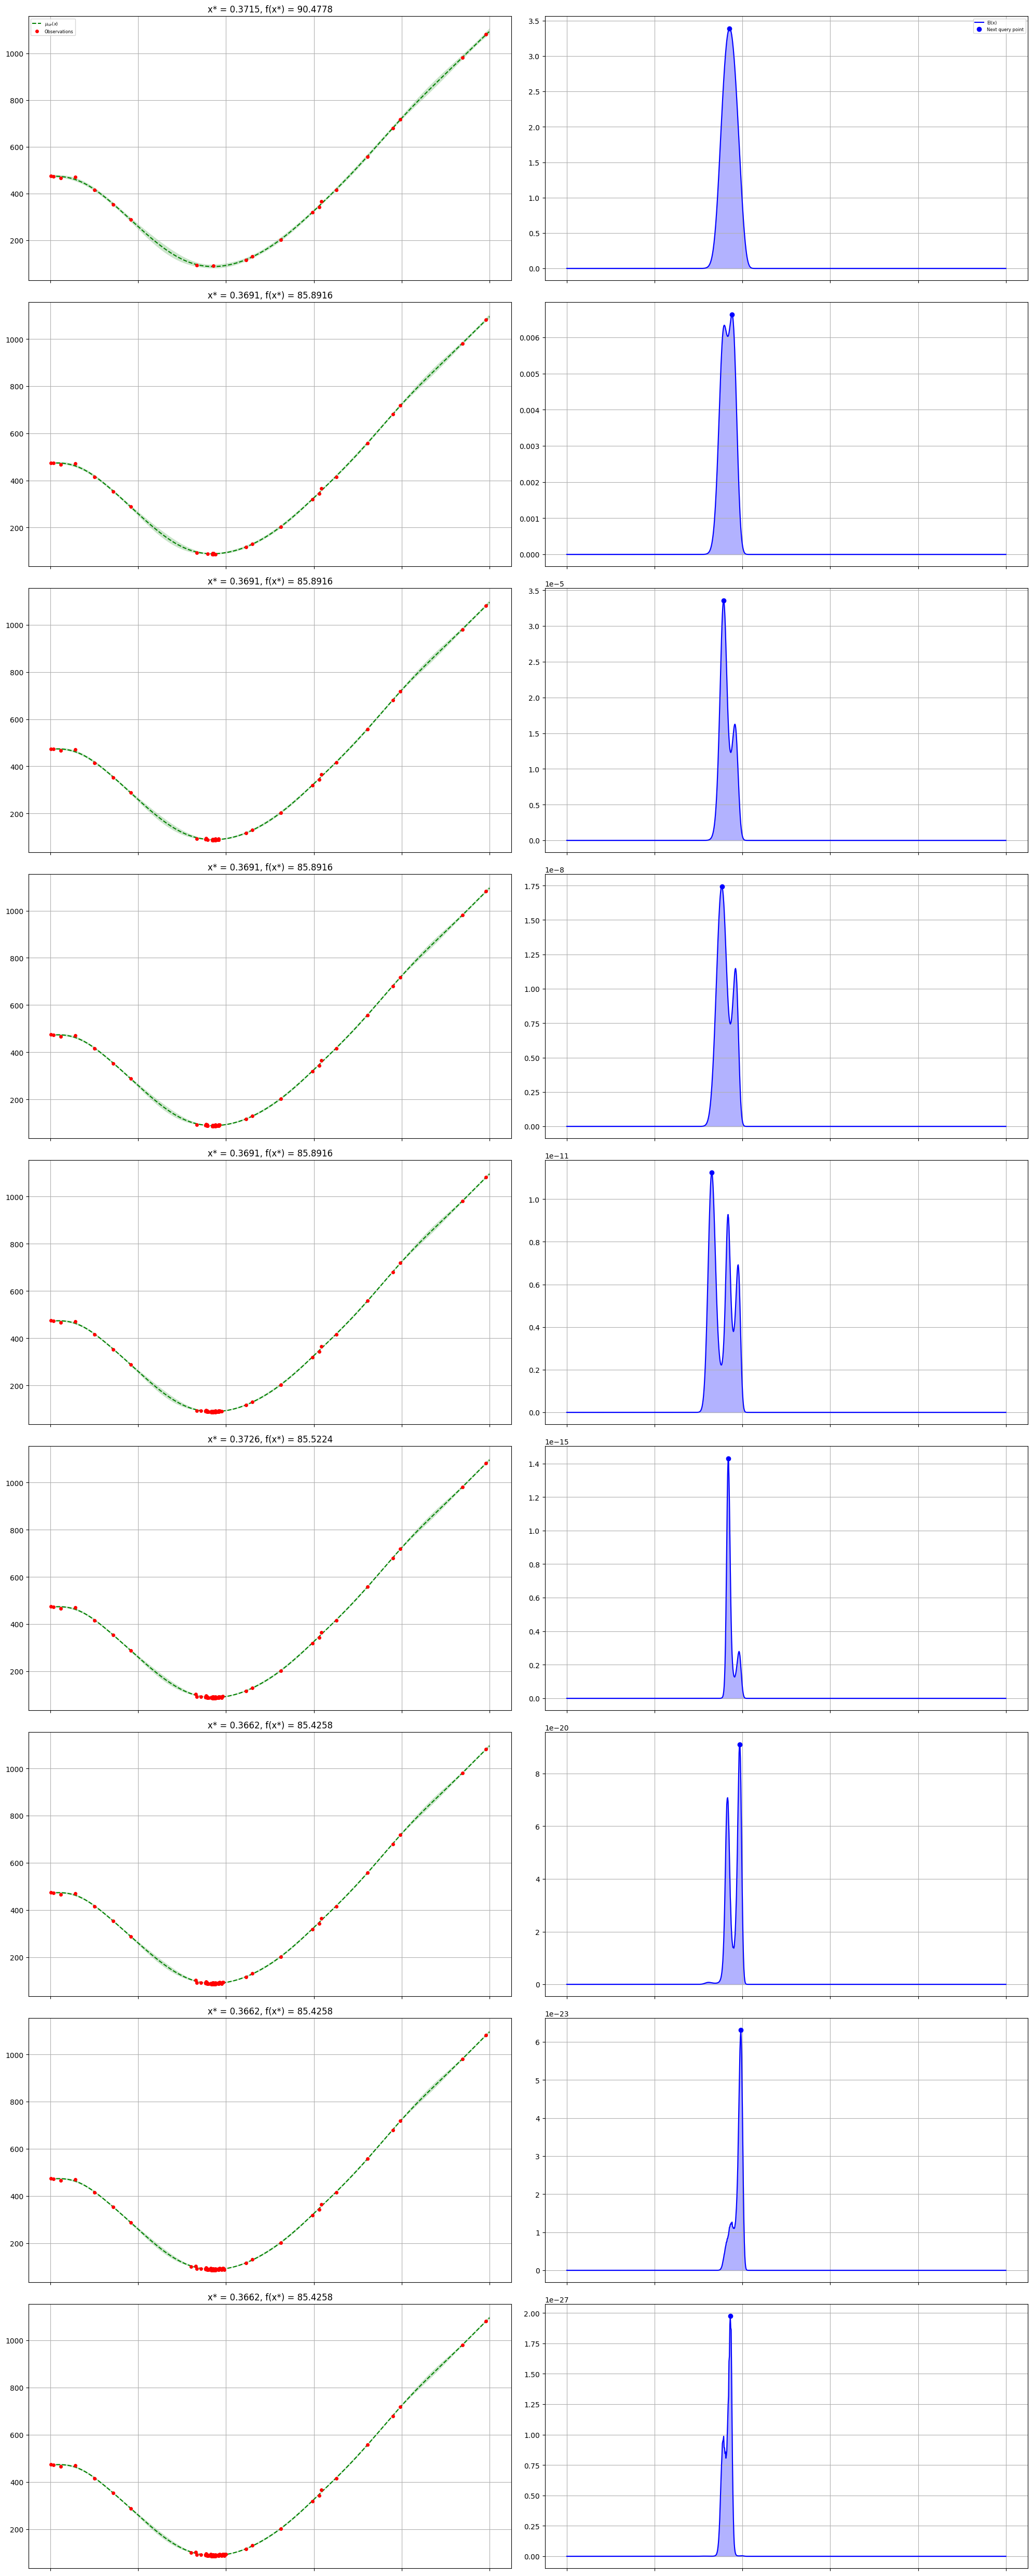

In [30]:
n_events = int(1e6)

fig = plt.figure(figsize=(20, 60))

itrs = 100

verbose = 10

for i in range(itrs):

    if i % verbose == 0:
        print(f'Iteration number {i + 1}')
    
    next_x = opt_gp.ask()
    f_val = objective(next_x, n_events, refs, np.sum)
    res = opt_gp.tell(next_x, f_val)
    
    if (i >= n_initial_points) * (((i - n_initial_points) % verbose == 0) + (i == (itrs - 1))):
    
        plot_optimizer(res, n_iter=(i - n_initial_points) // verbose + (i == (itrs - 1)),
                       max_iters=(itrs - n_initial_points) // verbose + 2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [10]:
n_initial_points = 1

opt_gp = Optimizer([(0., 1.)],
                   base_estimator="GP",
                   n_initial_points=n_initial_points,
                   acq_optimizer="sampling", acq_func='EI',
                   random_state=42, n_jobs=-1)

Iteration number 1


100%|██████████| 1000000/1000000 [02:11<00:00, 7630.66it/s]


Iteration number 2


100%|██████████| 1000000/1000000 [02:25<00:00, 6895.04it/s]


Iteration number 3


100%|██████████| 1000000/1000000 [02:34<00:00, 6470.49it/s]


Iteration number 4


100%|██████████| 1000000/1000000 [02:19<00:00, 7190.45it/s]


Iteration number 5


100%|██████████| 1000000/1000000 [02:16<00:00, 7317.21it/s]


Iteration number 6


100%|██████████| 1000000/1000000 [02:16<00:00, 7314.60it/s]


Iteration number 7


100%|██████████| 1000000/1000000 [02:17<00:00, 7284.26it/s]


Iteration number 8


100%|██████████| 1000000/1000000 [02:17<00:00, 7284.71it/s]


Iteration number 9


100%|██████████| 1000000/1000000 [02:18<00:00, 7232.65it/s]


Iteration number 10


100%|██████████| 1000000/1000000 [02:16<00:00, 7335.83it/s]


Iteration number 11


100%|██████████| 1000000/1000000 [02:19<00:00, 7181.63it/s]


Iteration number 12


100%|██████████| 1000000/1000000 [02:13<00:00, 7479.12it/s]


Iteration number 13


100%|██████████| 1000000/1000000 [02:13<00:00, 7506.04it/s]


Iteration number 14


100%|██████████| 1000000/1000000 [02:13<00:00, 7493.41it/s]


Iteration number 15


100%|██████████| 1000000/1000000 [02:14<00:00, 7425.79it/s]


Iteration number 16


100%|██████████| 1000000/1000000 [02:16<00:00, 7335.17it/s]


Iteration number 17


100%|██████████| 1000000/1000000 [02:14<00:00, 7455.95it/s]


Iteration number 18


100%|██████████| 1000000/1000000 [02:07<00:00, 7863.56it/s]


Iteration number 19


100%|██████████| 1000000/1000000 [02:13<00:00, 7485.94it/s]


Iteration number 20


100%|██████████| 1000000/1000000 [02:15<00:00, 7394.31it/s]


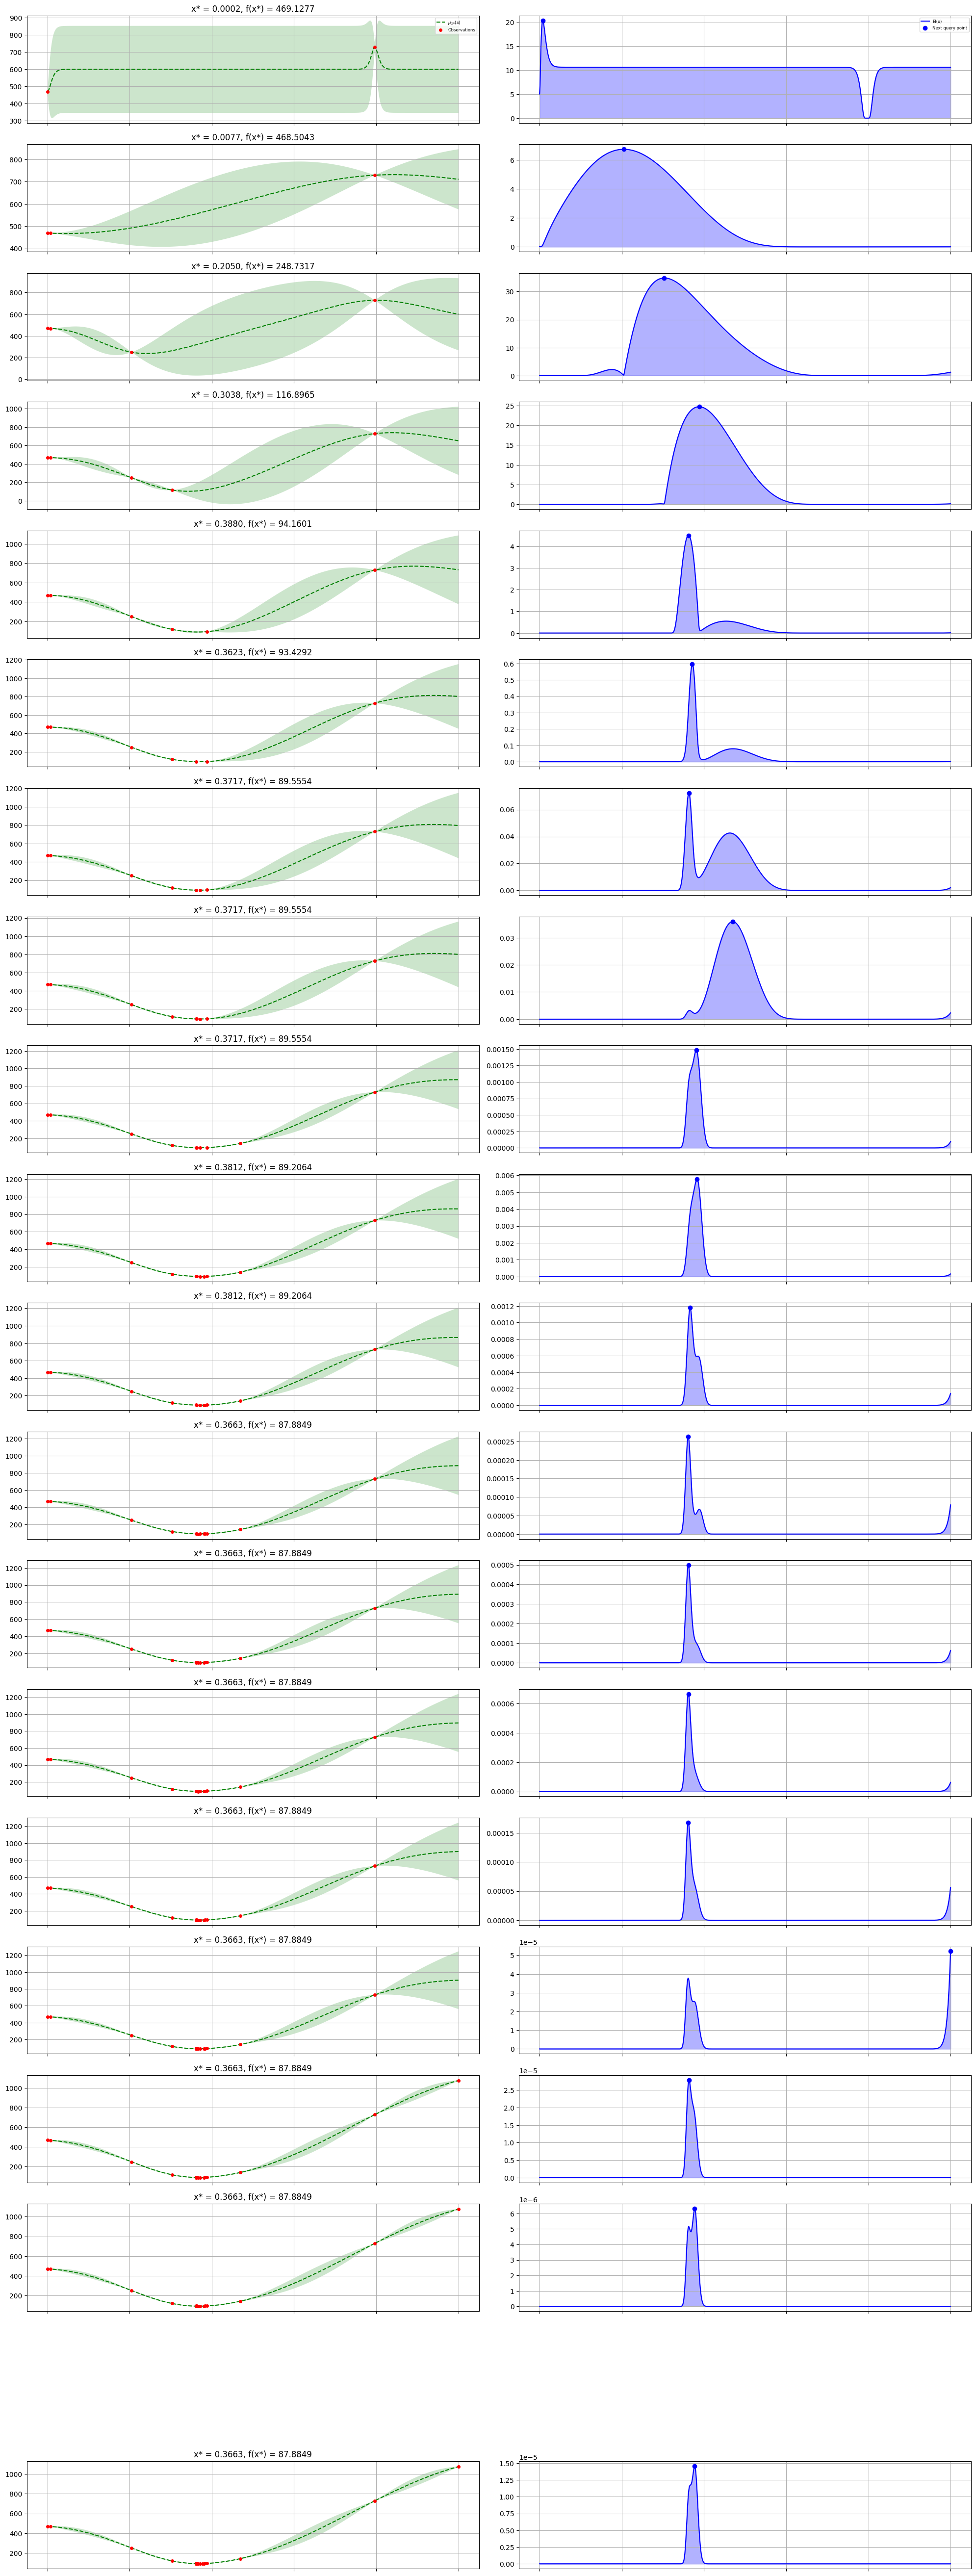

In [11]:
n_events = int(1e6)

fig = plt.figure(figsize=(20, 60))

itrs = 20

verbose = 1

for i in range(itrs):

    if i % verbose == 0:
        print(f'Iteration number {i + 1}')
    
    next_x = opt_gp.ask()
    f_val = objective(next_x, n_events, refs, np.sum)
    res = opt_gp.tell(next_x, f_val)
    
    if (i >= n_initial_points) * (((i - n_initial_points) % verbose == 0) + (i == (itrs - 1))):
    
        plot_optimizer(res, n_iter=(i - n_initial_points) // verbose + (i == (itrs - 1)),
                       max_iters=(itrs - n_initial_points) // verbose + 2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

----